In [2]:
#!pip install ydata_profiling;  kagglehub

# EDA part

In [3]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
from ydata_profiling import ProfileReport
import kagglehub
from sklearn.neighbors import KNeighborsClassifier
import os
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
# Download latest version

folder = kagglehub.dataset_download("khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset")

In [5]:
# list the files in the folder
file =  os.listdir(folder)

In [6]:
# create dataframe
df = pd.read_csv(f"{folder}/{file[0]}")

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [8]:
# Generate a profile report using ydata_profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the report
#profile.to_notebook_iframe()

In [9]:
# show columns
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [10]:
# quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [11]:
# the data source is from transfermarket, therefore its trustworthy

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [12]:
# the data is updated since 2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [13]:
# only one dataset is used, consistency is not applied

#### 4. Relevance: 


In [14]:
# primarly, the unnecessary column is player link

In [15]:
# drop player column and name of player
df.drop('name', axis=1, inplace=True)
df.drop('player', axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# No duplicates

#### 6. Completeness: 

In [18]:
#Display number missing values per column
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# No missing values

#### 7. Check Accuracy:

In [20]:
# check columns types 
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [21]:
df['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [22]:
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [23]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

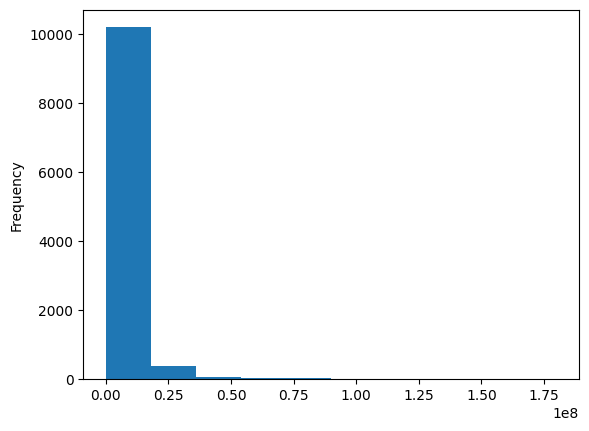

In [24]:
df['current_value'].plot(kind='hist')

plt.show()

In [25]:
#let us see the players that has no value
df[df['current_value'] == 0]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,Manchester United,Attack-RightWinger,181.000000,21.000000,24,0.317647,0.105882,0.105882,0.0,0.0,0.0,0.0,1700,135,12,0,0,50000000,4,1
406,Newcastle United,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,0.0,0.0,0.0,0.0,6560,118,19,4,0,0,2,0
407,Newcastle United,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,0.0,0.0,0.0,0.0,5911,285,30,3,0,0,2,0
408,Newcastle United,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,0.0,0.0,0.0,0.0,2609,418,57,2,0,0,2,0
409,Newcastle United,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,0.0,0.0,0.0,0.0,3790,380,66,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,Brisbane Roar,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1
10586,Brisbane Roar,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0
10587,Brisbane Roar,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0
10686,Sydney FC,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,3,0


In [26]:
# some players have historic appearances, we need to filter that players that has no value and no appearance
df[(df['current_value'] == 0) & (df['appearance'] == 0)]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1032,RB Leipzig,Goalkeeper,187.000000,19.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0
2630,Paris Saint-Germain,Defender Left-Back,170.000000,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1
3423,Coritiba Foot Ball Club,Defender Right-Back,173.000000,19.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1
3578,Botafogo de Futebol e Regatas,Defender Centre-Back,193.000000,20.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0
6924,Portland Timbers,midfield-CentralMidfield,180.000000,22.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0
8316,Kawasaki Frontale,midfield-LeftMidfield,180.000000,18.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,1
8357,Yokohama F. Marinos,Attack,166.000000,16.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0
8414,Kyoto Sanga,Defender Left-Back,180.000000,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1
8444,FC Tokyo,Goalkeeper,191.000000,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0
8621,Sagan Tosu,Goalkeeper,191.000000,21.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0


In [27]:
# drop them
df = df[(df['current_value'] > 0) & (df['appearance'] > 0)]

In [28]:
# statistical summary of current value
df['current_value'].describe().apply(lambda x: format(x, '.0f'))

count        10232
mean       3797906
std        9289901
min          10000
25%         300000
50%         850000
75%        3000000
max      180000000
Name: current_value, dtype: object

In [29]:
#df = df[(df['current_value']>25000) & (df['current_value']<170000000)]

In [30]:
# statistical summary of current value
df['current_value'].describe().apply(lambda x: format(x, '.0f'))

count        10232
mean       3797906
std        9289901
min          10000
25%         300000
50%         850000
75%        3000000
max      180000000
Name: current_value, dtype: object

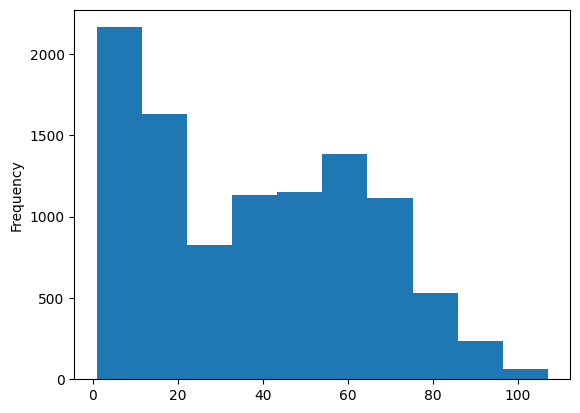

In [31]:
# show histogram of appearance
df['appearance'].plot(kind='hist')
plt.show()

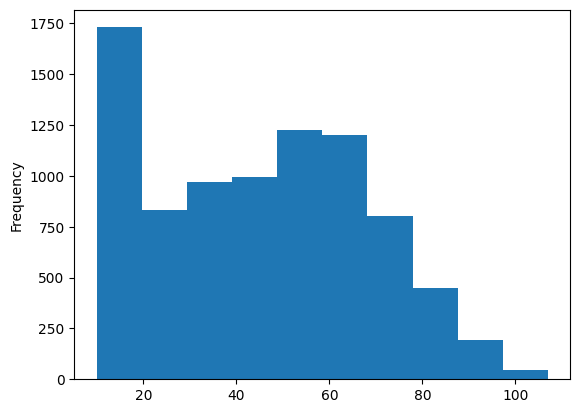

In [32]:
# filter appearances that is more than or qual to 20 appearances
df = df[(df['appearance']>=10)]
df['appearance'].plot(kind='hist')
plt.show()

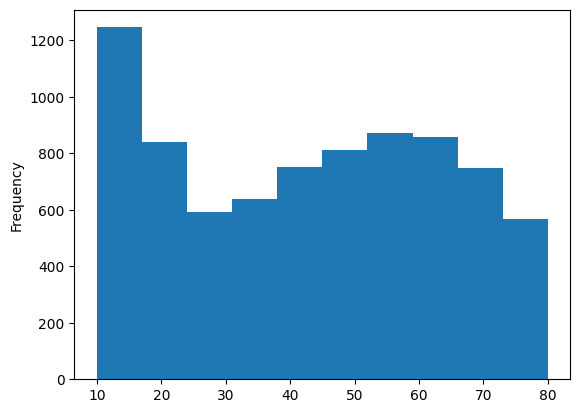

In [33]:
# filter appearances that is more than or qual to 20 appearances
df = df[(df['appearance']<=80)]
df['appearance'].plot(kind='hist')
plt.show()

In [34]:
df.shape

(7928, 20)

In [35]:
# detect outliers using zscore
# first select numeric columns
numric_df = df.select_dtypes(include=['number'])
zscores = numric_df.apply(zscore)

In [36]:
# show zscore
abs(zscores)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,2.121961,0.802919,1.320640,0.789030,0.871010,0.878110,0.267670,0.296251,2.862991,2.066767,0.936499,2.121574,1.691533,0.275810,0.264737,1.392443,1.836192,0.686997
4,1.403526,0.802919,0.992754,0.683056,0.700943,0.992815,0.267670,0.296251,0.301638,0.290057,1.316920,0.604920,1.400509,5.370719,5.340727,6.434214,0.793777,0.686997
5,1.834587,0.802919,1.233732,0.565111,0.871010,0.865691,0.756277,0.296251,0.301638,0.290057,1.154277,0.103086,0.402716,0.275810,3.156780,5.564943,0.793777,0.686997
6,0.828778,0.368765,1.330124,0.789030,0.558231,0.533391,0.267670,0.296251,0.301638,0.290057,1.582953,0.192439,0.070118,2.265128,1.700815,2.522495,0.793777,0.686997
8,0.685091,1.150774,0.404922,0.789030,0.871010,0.418495,0.267670,0.296251,0.301638,0.290057,0.057381,0.460083,0.179330,0.558136,0.191939,0.346099,0.793777,0.686997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.001192,1.367851,1.272445,0.253300,0.034641,0.578282,0.267670,0.296251,0.301638,0.290057,1.106397,0.722152,0.719802,0.558136,0.472212,0.513434,1.291054,1.455611
10750,1.259839,0.499543,0.790487,1.418638,0.900429,0.001508,0.267670,0.296251,0.301638,0.290057,0.848829,0.153407,0.028543,0.558136,0.439453,0.493875,1.291054,0.686997
10751,0.001192,1.584928,1.079662,1.432436,0.871010,0.007194,0.267670,0.296251,0.301638,0.290057,1.144488,0.722152,0.719802,0.558136,0.475852,0.515607,1.291054,0.686997
10752,0.001192,1.367851,1.224249,1.060052,0.118129,1.393821,0.267670,5.028968,0.301638,0.290057,1.201927,0.722152,0.719802,0.558136,0.475852,0.515607,1.291054,0.686997


In [37]:
# set a threshold for zscore

threshold = 3.5 # common value
outliers = df[(abs(zscores) > threshold).any(axis=1)]

# show outlers calculated by zscore
outliers

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.000000,0.000000,0.0,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Defender Centre-Back,194.000000,30.0,68,0.037799,0.000000,0.302394,0.018900,0.000000,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
9,Manchester United,Defender Left-Back,178.000000,27.0,74,0.015374,0.169115,0.353604,0.000000,0.000000,0.0,0.0,5854,443,70,4,35000000,42000000,2,1
12,Manchester United,Defender Right-Back,183.000000,24.0,72,0.032293,0.048439,0.226050,0.000000,0.000000,0.0,0.0,5574,328,49,3,35000000,35000000,2,1
16,Manchester United,midfield-CentralMidfield,182.000000,31.0,55,0.067214,0.313667,0.089619,0.000000,0.000000,0.0,0.0,4017,0,0,10,25000000,100000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,Sydney FC,Attack Centre-Forward,181.240353,20.0,16,0.000000,0.486486,0.000000,0.486486,0.000000,0.0,0.0,185,0,0,0,50000,50000,4,0
10720,Adelaide United,Attack-RightWinger,175.000000,17.0,35,0.924262,0.231065,1.039795,0.000000,0.000000,0.0,0.0,779,0,0,0,350000,350000,4,1
10726,Adelaide United,Attack Centre-Forward,185.000000,21.0,10,0.000000,0.796460,0.000000,0.000000,0.000000,0.0,0.0,113,0,0,0,50000,50000,4,0
10743,Western Sydney Wanderers,midfield-AttackingMidfield,185.000000,21.0,40,0.658537,0.219512,0.658537,0.000000,0.000000,0.0,0.0,820,0,0,1,200000,200000,3,0


In [38]:
# drop rows that is equal to outliers
df = df[~df.isin(outliers)].dropna()

In [39]:
df.select_dtypes('object').columns

Index(['team', 'position'], dtype='object')

In [40]:
team_firsts = df['team'].value_counts().sort_values(ascending=False)

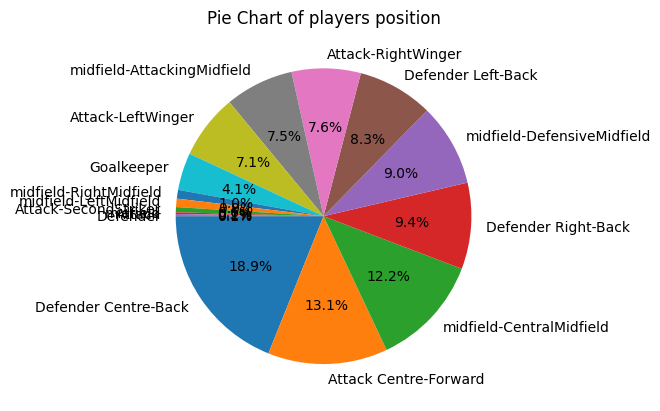

In [41]:
# pie chart of position
plt.Figure(figsize=(15,10))
# increase the size of the chart
plt.pie(df['position'].value_counts(), labels=df['position'].value_counts().index, autopct='%1.1f%%',startangle=180,labeldistance=1.1)
plt.title('Pie Chart of players position')
plt.show()

In [42]:
df['position'].value_counts().sort_values(ascending=False)

position
Defender Centre-Back          1285
Attack Centre-Forward          889
midfield-CentralMidfield       829
Defender Right-Back            641
midfield-DefensiveMidfield     612
Defender Left-Back             562
Attack-RightWinger             513
midfield-AttackingMidfield     509
Attack-LeftWinger              481
Goalkeeper                     277
midfield-RightMidfield          65
midfield-LeftMidfield           62
Attack-SecondStriker            38
midfield                        13
Attack                           9
Defender                         7
Name: count, dtype: int64

In [43]:
# we will drop posistion that is less than 2% of total
# try to drop them
index = df[(df['position']=='Defender')| (df['position']=='Attack') | (df['position']=='midfield')| (df['position']=='Attack-SecondStriker') | (df['position']=='midfield-RightMidfield') | (df['position']=='midfield-LeftMidfield')].index
#df = df.drop(index,axis=0)

## 4. Bivariate/Multivariate Analysis:

**categorical & numerical**

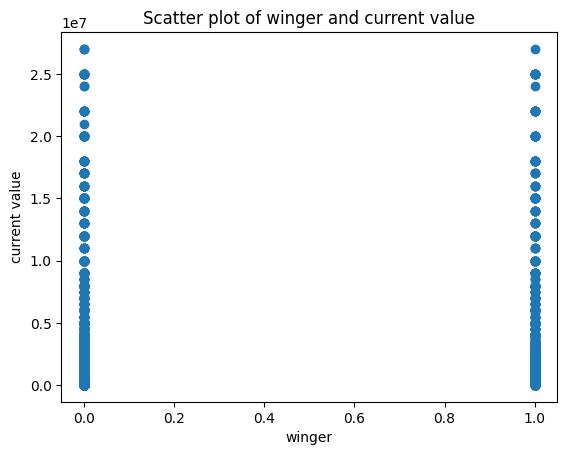

In [44]:
# relationship between winger and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['winger'],df['current_value'])
plt.title('Scatter plot of winger and current value')
plt.xlabel('winger')
plt.ylabel('current value')
plt.show()

In [45]:
# there is no effect wheather the player is winger or not, therefore drop the winger column
df = df.drop(['winger'],axis=1)

**numerical & numerical**

In [46]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                  float64
current_value          float64
highest_value          float64
position_encoded       float64
dtype: object

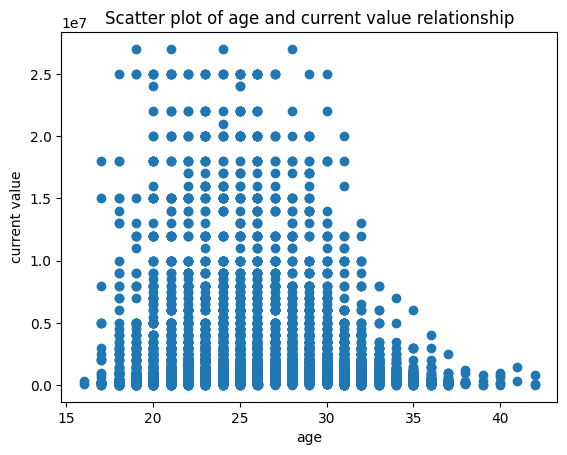

In [47]:
# show line chart of highest value and goal relationship
plt.Figure(figsize=(15,10))
plt.scatter(df['age'],df['current_value'])
plt.title('Scatter plot of age and current value relationship')
plt.xlabel('age')
plt.ylabel('current value')
plt.show()

In [48]:
# age between 17 and 37 scores more goals

# filter them

df = df[(df['age']>=17) & (df['age']<=37)]

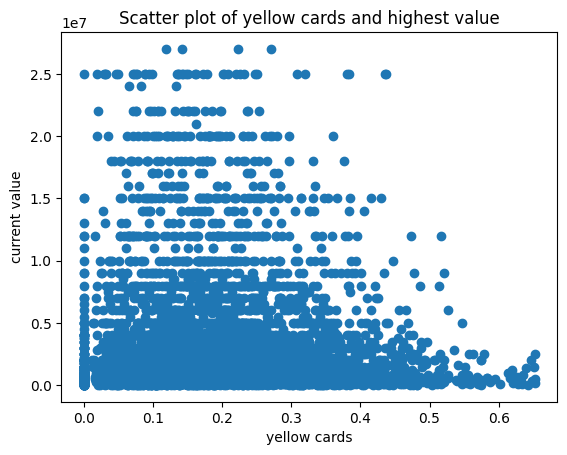

In [49]:
# relationship between yellow card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['yellow cards'],df['current_value'])
plt.title('Scatter plot of yellow cards and highest value')
plt.xlabel('yellow cards')
plt.ylabel('current value')
plt.show()

In [50]:
# the minimum value of yellow cards in life of player, the highest value of his price will be
# filter out more yellow cards players
df = df[(df['yellow cards']<0.8)]

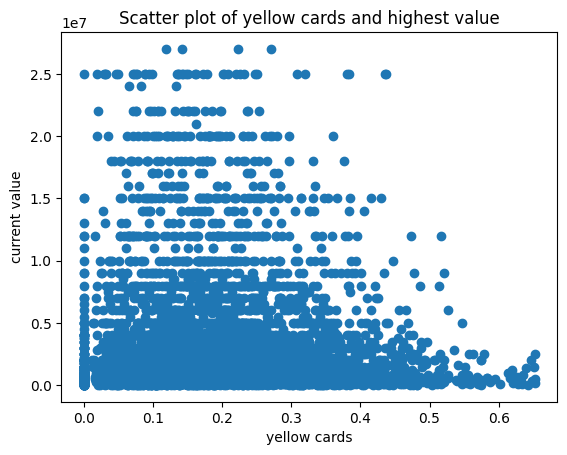

In [51]:
# relationship between yellow card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['yellow cards'],df['current_value'])
plt.title('Scatter plot of yellow cards and highest value')
plt.xlabel('yellow cards')
plt.ylabel('current value')
plt.show()

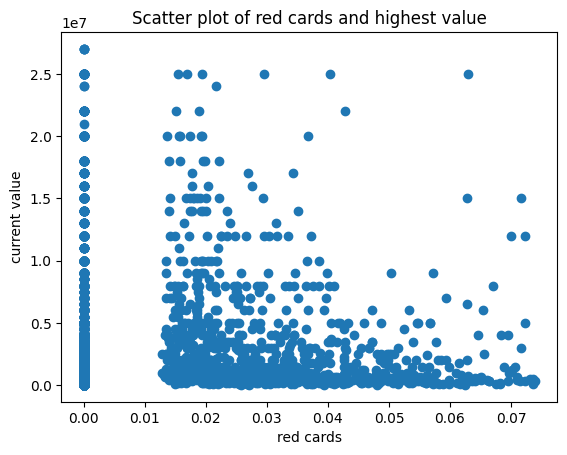

In [52]:
# relationship between red card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['red cards'],df['current_value'])
plt.title('Scatter plot of red cards and highest value')
plt.xlabel('red cards')
plt.ylabel('current value')
plt.show()

In [53]:
# the minimum value of red cards and yellow cards in life of player, the highest value of his price will be
# filter out more red cards players
df = df[(df['red cards']<=0.100)]

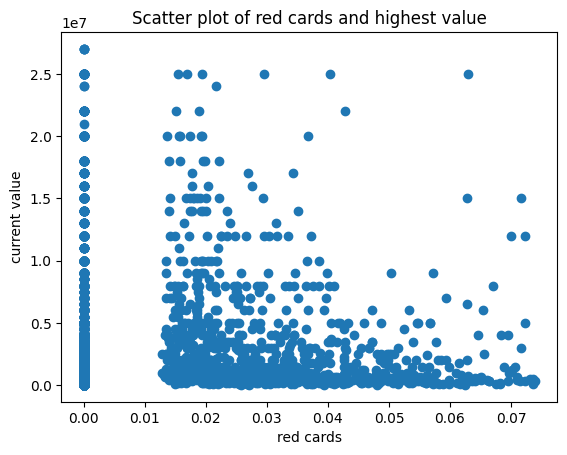

In [54]:
# relationship between red card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['red cards'],df['current_value'])
plt.title('Scatter plot of red cards and highest value')
plt.xlabel('red cards')
plt.ylabel('current value')
plt.show()

In [55]:
df.shape

(6764, 19)

# Kmean part

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

## 1. Feature engineering
Feature scaling

One hot encoding

In [57]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                  float64
current_value          float64
highest_value          float64
position_encoded       float64
dtype: object

In [58]:
# encode object columns
df = pd.get_dummies(df, columns=['team', 'position'])

In [59]:
df.shape

(6764, 407)

In [60]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,196.0,30.0,15.0,0.0,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
6,187.0,28.0,70.0,0.0,0.032901,0.115153,0.0,0.0,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [61]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,196.000000,30.0,15.0,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
6,187.000000,28.0,70.0,0.000000,0.032901,0.115153,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
8,186.000000,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
11,180.000000,22.0,34.0,0.000000,0.033507,0.335071,0.0,0.000000,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False
13,183.000000,25.0,60.0,0.000000,0.018817,0.094083,0.0,0.018817,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,178.000000,22.0,32.0,0.226700,0.000000,0.283375,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10749,181.240353,20.0,16.0,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10750,190.000000,24.0,26.0,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10751,181.240353,19.0,20.0,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


## 2. Feature selection

In [62]:
# selcet numerical columns and high effected columns on price
selected_features = ['appearance', 'goals', 'assists', 'minutes played']

In [63]:
df = df[selected_features]
df.head()

,appearance,goals,assists,minutes played
1,15.0,0.0,0.000000,1304.0
6,70.0,0.0,0.032901,5471.0
8,34.0,0.0,0.000000,2758.0
11,34.0,0.0,0.033507,2686.0
13,60.0,0.0,0.018817,4783.0


## 3. Prepare train and test data

In [64]:
# Prepare data
X = df

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X.shape

(6764, 4)

## Buliding the Model

In [66]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 6

In [67]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [68]:
distances[:,min_samples-1]

array([0.01543216, 0.21362004, 0.0842892 , ..., 0.36150386, 0.19900087,
       0.04940351])

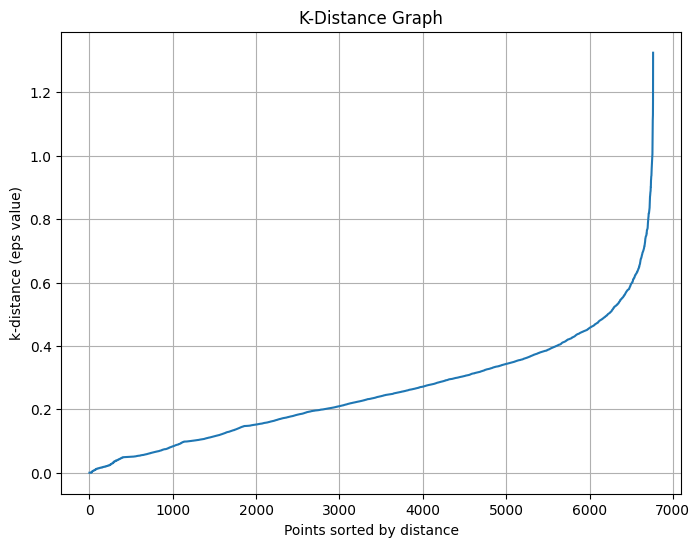

In [69]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [70]:
from sklearn.cluster import DBSCAN

# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 0.5  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train the Model

In [71]:
# Fit the model on the training data
clusters = dbscan.fit_predict(X_scaled)

In [72]:
pd.Series(clusters).value_counts()

 0    6445
-1     289
 2       8
 1       6
 3       6
 4       5
 5       5
Name: count, dtype: int64

## Evaluating the Model

In [73]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

np.float64(-0.6162971383705758)

In [74]:
X.head(2)

,appearance,goals,assists,minutes played
1,15.0,0.0,0.000000,1304.0
6,70.0,0.0,0.032901,5471.0


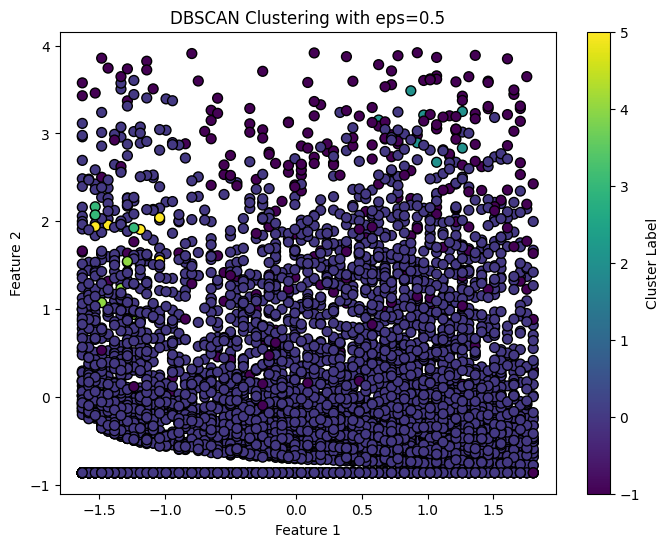

In [75]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [76]:
X['dbscan'] = clusters

C:\Users\Ghada\AppData\Local\Temp\ipykernel_14140\3457809322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dbscan'] = clusters


In [77]:
X['dbscan'].value_counts()

dbscan
 0    6445
-1     289
 2       8
 1       6
 3       6
 4       5
 5       5
Name: count, dtype: int64

<Axes: xlabel='goals', ylabel='minutes played'>

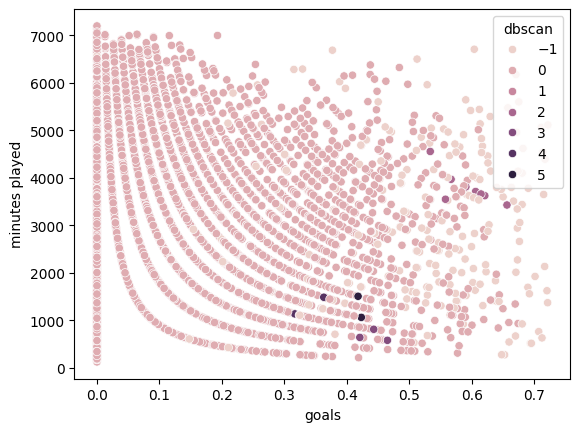

In [78]:
sns.scatterplot(data = X , x = 'goals', y = 'minutes played', hue = 'dbscan')

<Axes: xlabel='appearance', ylabel='minutes played'>

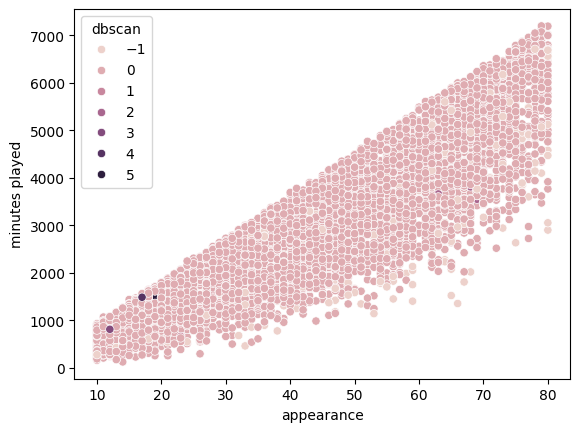

In [79]:
sns.scatterplot(data = X , x = 'appearance', y = 'minutes played', hue = 'dbscan')

<Axes: xlabel='appearance', ylabel='assists'>

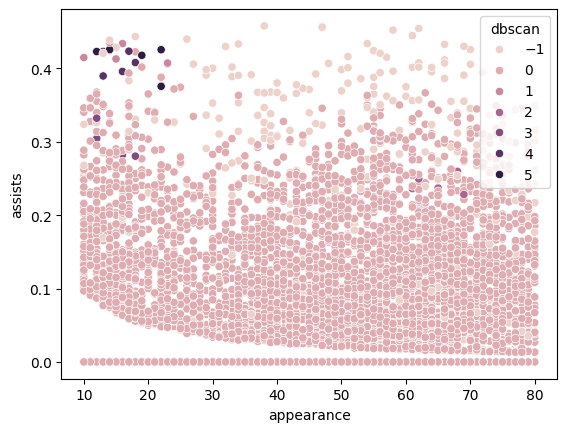

In [80]:
sns.scatterplot(data = X , x = 'appearance', y = 'assists', hue = 'dbscan')